In [1]:
!pip install mlflow

     |████████████████████████████████| 13.9MB 234kB/s 
     |████████████████████████████████| 163kB 53.9MB/s 
     |████████████████████████████████| 327kB 54.3MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 1.1MB 37.9MB/s 
     |████████████████████████████████| 6.0MB 49.8MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 153kB 50.4MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 122kB 51.2MB/s 
     |████████████████████████████████| 2.6MB 39.0MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 204kB 54.1MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.11.0-cp36-none-any.whl size=90301 sha256=b7f8c62866b2bfb4d8fe3aab49b82f5fbafa0c1ccc0b51b584a3ad2d02fc28ad
 

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import mlflow
import mlflow.sklearn
from datetime import datetime

# Semilla
seed = 1234
np.random.seed(seed)

# 1. Images

In [3]:
!wget 'https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/vanessa_navarro_alu_uclm_es/EVPi-q67awFBryuutLEB32cB9w5gfnmEo6NcER9AOIDxIA?download=1'
!mv 'EVPi-q67awFBryuutLEB32cB9w5gfnmEo6NcER9AOIDxIA?download=1' image.zip
!unzip -q image.zip

--2020-09-07 10:08:26--  https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/vanessa_navarro_alu_uclm_es/EVPi-q67awFBryuutLEB32cB9w5gfnmEo6NcER9AOIDxIA?download=1
Resolving pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)... 13.107.136.9
Connecting to pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/vanessa_navarro_alu_uclm_es/Documents/TFM/membrane/image.zip?&originalPath=aHR0cHM6Ly9wcnVlYmFzYWx1dWNsbS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC92YW5lc3NhX25hdmFycm9fYWx1X3VjbG1fZXMvRVZQaS1xNjdhd0ZCcnl1dXRMRUIzMmNCOXc1Z2ZubUVvNk5jRVI5QU9JRHhJQT9ydGltZT1XaUhWOEJWVDJFZw [following]
--2020-09-07 10:08:27--  https://pruebasaluuclm-my.sharepoint.com/personal/vanessa_navarro_alu_uclm_es/Documents/TFM/membrane/image.zip?&originalPath=aHR0cHM6Ly9wcnVlYmFzYWx1dWNsbS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC92YW5lc3NhX25hdmFycm9fYWx1X3VjbG1fZXMvRVZQaS1

In [4]:
!wget 'https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/vanessa_navarro_alu_uclm_es/EeplRhu82PFCsBp8DkWX0ukBryZOXtDwT-zJUYVJHVSddg?download=1'
!mv 'EeplRhu82PFCsBp8DkWX0ukBryZOXtDwT-zJUYVJHVSddg?download=1' label.zip
!unzip -q label.zip

--2020-09-07 10:08:30--  https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/vanessa_navarro_alu_uclm_es/EeplRhu82PFCsBp8DkWX0ukBryZOXtDwT-zJUYVJHVSddg?download=1
Resolving pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)... 13.107.136.9
Connecting to pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/vanessa_navarro_alu_uclm_es/Documents/TFM/membrane/label.zip?&originalPath=aHR0cHM6Ly9wcnVlYmFzYWx1dWNsbS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC92YW5lc3NhX25hdmFycm9fYWx1X3VjbG1fZXMvRWVwbFJodTgyUEZDc0JwOERrV1gwdWtCcnlaT1h0RHdULXpKVVlWSkhWU2RkZz9ydGltZT0xTXk1OGhWVDJFZw [following]
--2020-09-07 10:08:30--  https://pruebasaluuclm-my.sharepoint.com/personal/vanessa_navarro_alu_uclm_es/Documents/TFM/membrane/label.zip?&originalPath=aHR0cHM6Ly9wcnVlYmFzYWx1dWNsbS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC92YW5lc3NhX25hdmFycm9fYWx1X3VjbG1fZXMvRWVwbFJ

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# import zipfile
# path = '/content/drive/My Drive/CIDAEN/TFM Vanessa/membrane/'
# with zipfile.ZipFile(path + 'image.zip', 'r') as zip_ref:
#     zip_ref.extractall('image')
# with zipfile.ZipFile(path + 'label.zip', 'r') as zip_ref:
#     zip_ref.extractall('label')

In [7]:
from glob import glob

# Files
files = np.array(sorted(glob("image/*")))
# Targets
targets = np.array(sorted(glob("label/*")))

# Random permute
idx = np.random.permutation(len(files))
files = files[idx]
targets = targets[idx]

print("Loaded %d files." % len(files))

Loaded 30 files.


<class 'numpy.ndarray'>


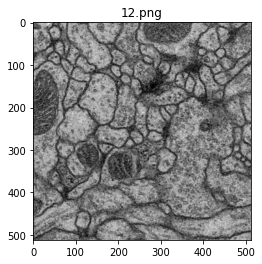

In [8]:
def display_image(img_path):
    # Leer la imagen
    img = plt.imread(img_path)
    print(type(img))
    
    # Visualizar la imagen
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.title(img_path.split('/')[-1])
    plt.show()
    
image_id = np.random.choice(len(files), 1)[0]
display_image(files[image_id])

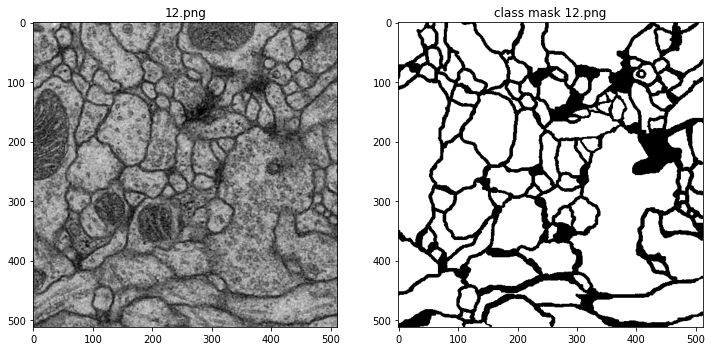

Loaded image type:  <class 'numpy.ndarray'>
Image size:  (512, 512)
Class mask size:  (512, 512)


In [9]:
def multiplot(images, labels):
    # Scale figure size
    default_size = plt.rcParams['figure.figsize']
    fig = plt.figure(figsize=[default_size[0] * 2, default_size[1] * 2])
    
    # Plot images
    n = len(images)
    for i in range(n):
      fig.add_subplot(1, n, i + 1)
      plt.imshow(images[i], cmap=plt.get_cmap('gray'))
      # plt.axis('off')
      plt.title(labels[i])
        
    # Plot
    plt.show()

def display_image_with_class(img_path, label, img_id):
    # Load original image
    img = plt.imread(img_path)
    images = [img]
    labels = [label]
    
    # Class mask image
    class_mask = plt.imread(targets[img_id])
    images.append(class_mask)
    labels.append('class mask ' + label)
    
    # Plot images
    multiplot(images, labels)
    
    # Print image content
    print("Loaded image type: ", type(img))
    print("Image size: ",  img.shape)
    print("Class mask size: ", class_mask.shape)
    
#image_id = np.random.choice(len(files), 1)[0]
display_image_with_class(files[image_id], files[image_id].split('/')[-1], image_id)

In [10]:
def read_image(image_path, label):
  # Cargar y decodificar la imagen con TensorFlow
  contents = tf.io.read_file(image_path)
  # 1 solo canal de color (grayscale)
  img = tf.image.decode_jpeg(contents, channels=1)
  img = tf.cast(img, tf.float64)
  img /= 255.0

  # Máscara
  mask_contents = tf.io.read_file(label)
  y = tf.image.decode_jpeg(mask_contents, channels=1)
  y = tf.cast(y, tf.float64)
  y /= 255.0

  return img, y

<class 'tensorflow.python.framework.ops.EagerTensor'>


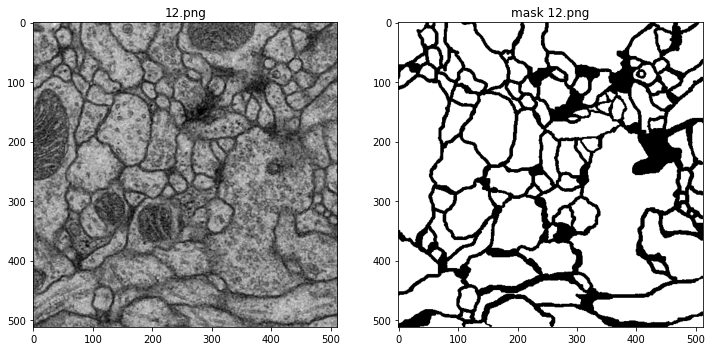

In [11]:
# Eager Execution!!!
# Carga la imagen usando la funcion read_image
img, y = read_image(files[image_id], targets[image_id])
print(type(img))

# Plot
multiplot([np.squeeze(img), np.squeeze(y)], [files[image_id].split('/')[-1], 'mask ' + str(files[image_id].split('/')[-1])])

In [12]:
def resize_image(img, y, target_size, aspect_ratio=True):
    # Reescalar imagen y su máscara
    if aspect_ratio:
      resized_img = tf.image.resize_with_pad(img, target_size[0], target_size[1])
      resized_y = tf.image.resize_with_pad(y, target_size[0], target_size[1])
    else:
      resized_img = tf.image.resize(img, target_size)
      resized_y = tf.image.resize(y, target_size)
    return resized_img, resized_y

def crop_image(img, y, target_size):
    # Recortar imagen
    cropped_img = tf.image.resize_with_crop_or_pad(img, target_size[0], target_size[1])
    return cropped_img, y

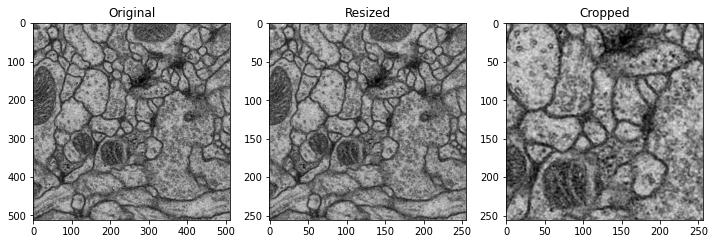

In [13]:
target_size = (256, 256)

# Llamar a resize_image y crop_image
resized_img, _ = resize_image(img, y, target_size, aspect_ratio=False)
# resized_pad_img, _ = resize_image(img, y, target_size, aspect_ratio=True)
cropped_img, _ = crop_image(img, y, target_size)

# Plot
multiplot([np.squeeze(img), np.squeeze(resized_img), np.squeeze(cropped_img)],
          ['Original', 'Resized', 'Cropped'])

# 2. Data augmentation

In [14]:
def flip_image(img, label):
    # Voltear imagen y label
    fimg = tf.image.flip_left_right(img)
    flabel = tf.image.flip_left_right(label)
    return fimg, flabel

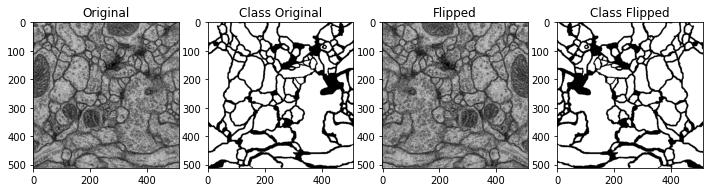

In [15]:
fimg, flabel = flip_image(img, y)
# Plot
multiplot([np.squeeze(img), np.squeeze(y), np.squeeze(fimg), np.squeeze(flabel)], 
          ['Original', 'Class Original', 'Flipped', 'Class Flipped'])

# 3. Datasets

In [16]:
def get_dataset(image_paths, image_labels, target_size, batch_size, is_train=True):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
    dataset = dataset.map(read_image)
    # dataset = dataset.map(lambda x, y: resize_image(x, y, target_size))
    if is_train:
      dataset = dataset.map(lambda x, y: flip_image(x, y))

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(1)
    
    return dataset

In [17]:
target_size = (512, 512)
batch_size = 2
epochs = 20

# train
train_dataset = get_dataset(files, targets, target_size, batch_size)
# test
test_dataset = get_dataset(files, targets, target_size, batch_size, is_train=False)

# 4. Segmentation

Fully Convolutional Network Model (Unet)
<img src="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png" width=50%>

## 4.1. First experiment: FCN model

In [18]:
def FCN_model(): # fully convolutional network
     # Input layer
    inputs = tf.keras.layers.Input(shape=(512, 512, 1)) # img shape, 1 channel for gray

    # convolution block 1: downsampling to 256x256 (pool_size=(2,2))
    c1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c1)

    # convolution block 2: downsampling to 128x128 (pool_size=(2,2))
    c2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(c2)
    c2 = tf.keras.layers.Dropout(0.4)(c2)
    p2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c2)

    # convolution block 3: downsampling to 64x64 (pool_size=(2,2))
    c3 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c3)
    c3 = tf.keras.layers.Dropout(0.4)(c3)
    p3 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c3)

    # convolution block 4: downsampling to 32x32
    c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(p3)
    c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c4)
    c4 = tf.keras.layers.Dropout(0.4)(c4)
    p4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c4)

    # convolution block 5: downsampling to 16x16
    c5 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(p4)
    c5 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c5)
    c5 = tf.keras.layers.Dropout(0.4)(c5)
    p5 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c5)

    # convolution block 6: downsampling to 8x8
    c6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(p5)
    c6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(c6)
    c6 = tf.keras.layers.Dropout(0.4)(c6)
    p6 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(c6)

    # convolution block 7: 512 filters
    c7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')(p6)
    c7 = tf.keras.layers.BatchNormalization()(c7)
    c7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')(c7)
    c7 = tf.keras.layers.BatchNormalization()(c7)

    # deconvolution block 1: upsampling to 16x16 (UpSampling2D(2,2))
    u8 = tf.keras.layers.UpSampling2D(size = (2,2))(c7)
    c8 = tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu', padding='same')(u8)
    c8 = tf.keras.layers.concatenate([c8, c6])
    c8 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(c8)
    c8 = tf.keras.layers.BatchNormalization()(c8)
    c8 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(c8)
    c8 = tf.keras.layers.BatchNormalization()(c8)

    # deconvolution block 2: upsampling to 32x32 (UpSampling2D(2,2))
    u9 = tf.keras.layers.UpSampling2D(size = (2,2))(c8)
    c9 = tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same')(u9)
    c9 = tf.keras.layers.concatenate([c9, c5])
    c9 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c9)
    c9 = tf.keras.layers.BatchNormalization()(c9)
    c9 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c9)
    c9 = tf.keras.layers.BatchNormalization()(c9)

    # deconvolution block 3: upsampling to 64x64 (UpSampling2D(2,2))
    u10 = tf.keras.layers.UpSampling2D(size = (2,2))(c9)
    c10 = tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same')(u10)
    c10 = tf.keras.layers.concatenate([c10, c4])
    c10 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c10)
    c10 = tf.keras.layers.BatchNormalization()(c10)
    c10 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c10)
    c10 = tf.keras.layers.BatchNormalization()(c10)

    # deconvolution block 4: upsampling to 128x128 (UpSampling2D(2,2))
    u11 = tf.keras.layers.UpSampling2D(size = (2,2))(c10)
    c11 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(u11)
    c11 = tf.keras.layers.concatenate([c11, c3])
    c11 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c11)
    c11 = tf.keras.layers.BatchNormalization()(c11)
    c11 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c11)
    c11 = tf.keras.layers.BatchNormalization()(c11)

    # deconvolution block 5: upsampling to 256x256 (UpSampling2D(2,2))
    u12 = tf.keras.layers.UpSampling2D(size = (2,2))(c11)
    c12 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), activation='relu', padding='same')(u12)
    c12 = tf.keras.layers.concatenate([c12, c2])
    c12 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(c12)
    c12 = tf.keras.layers.BatchNormalization()(c12)
    c12 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(c12)
    c12 = tf.keras.layers.BatchNormalization()(c12)

    # deconvolution block 6: upsampling to 512x512 (UpSampling2D(2,2))
    u13 = tf.keras.layers.UpSampling2D(size = (2,2))(c12)
    c13 = tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), activation='relu', padding='same')(u13)
    c13 = tf.keras.layers.concatenate([c13, c1])
    c13 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(c13)
    c13 = tf.keras.layers.BatchNormalization()(c13)
    c13 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(c13)
    c13 = tf.keras.layers.BatchNormalization()(c13)

    c13 = tf.keras.layers.Conv2D(filters=2, kernel_size=(3,3), activation='relu', padding='same')(c13)
    c13 = tf.keras.layers.BatchNormalization()(c13)
    
    # output
    outputs = tf.keras.layers.Conv2D(1, kernel_size=(1,1), strides=(1,1), activation='sigmoid')(c13)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='first_FCN_model')
    return model

model1 = FCN_model()
model1.summary()

Model: "first_FCN_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 8)  0           conv2d_1[0][0]                   
____________________________________________________________________________________

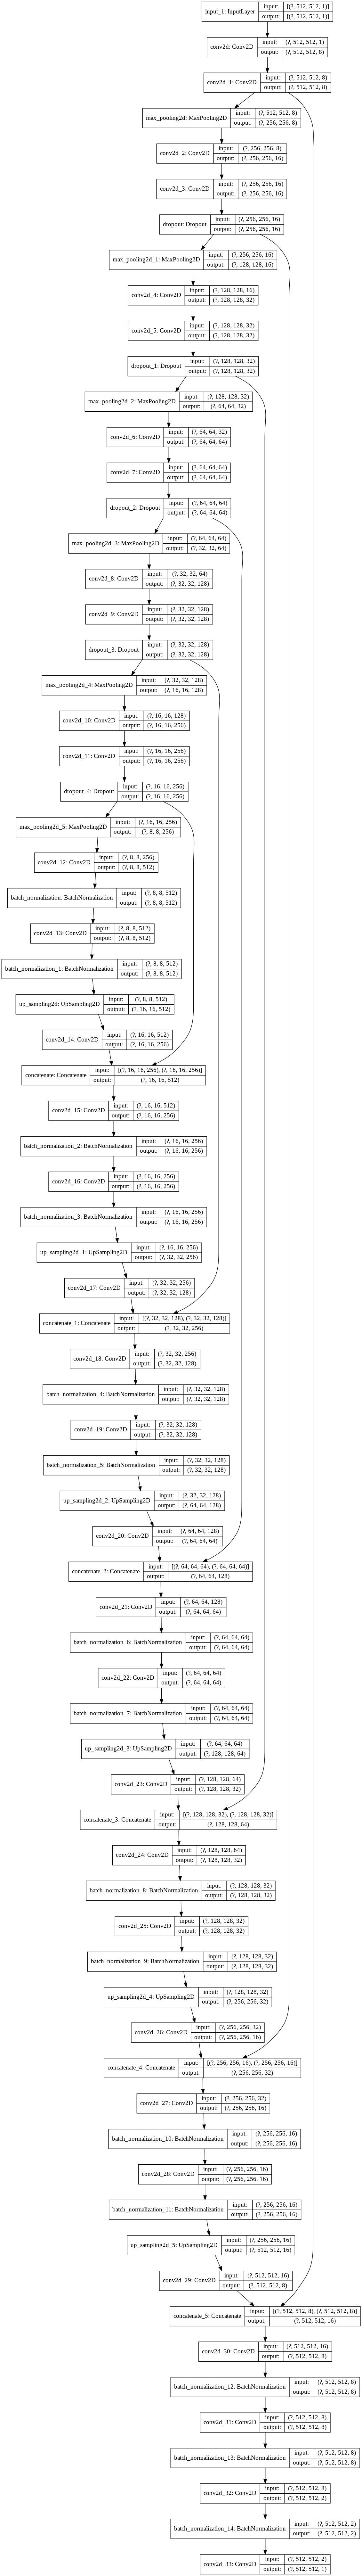

In [19]:
tf.keras.utils.plot_model(model1, show_shapes=True) # Visualize model graph

In [20]:
import keras.backend as K

# https://datascience.stackexchange.com/questions/58735/weighted-binary-cross-entropy-loss-keras-implementation
def weighted_bce(y_true, y_pred):
  weights = (y_true * 10.) + 1.
  bce = K.binary_crossentropy(y_true, y_pred)
  weighted_bce = K.mean(bce * weights)
  return weighted_bce

In [21]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0000001),
    loss = weighted_bce, #'binary_crossentropy',
    metrics=[
             'accuracy', 
             tf.keras.metrics.Precision(name='precision'), 
             tf.keras.metrics.Recall(name='recall')
            ]
)

Training

In [27]:
history1 = model1.fit(train_dataset, epochs=epochs) # Training

Epoch 1/20
15/15 [==============================] - 1s 56ms/step - loss: 6.6790 - accuracy: 0.5885 - precision: 0.7791 - recall: 0.6598
Epoch 2/20
15/15 [==============================] - 1s 54ms/step - loss: 6.6749 - accuracy: 0.5888 - precision: 0.7795 - recall: 0.6598
Epoch 3/20
15/15 [==============================] - 1s 55ms/step - loss: 6.6765 - accuracy: 0.5885 - precision: 0.7792 - recall: 0.6597
Epoch 4/20
15/15 [==============================] - 1s 54ms/step - loss: 6.6781 - accuracy: 0.5884 - precision: 0.7790 - recall: 0.6597
Epoch 5/20
15/15 [==============================] - 1s 54ms/step - loss: 6.6744 - accuracy: 0.5890 - precision: 0.7795 - recall: 0.6601
Epoch 6/20
15/15 [==============================] - 1s 54ms/step - loss: 6.6775 - accuracy: 0.5885 - precision: 0.7791 - recall: 0.6597
Epoch 7/20
15/15 [==============================] - 1s 54ms/step - loss: 6.6760 - accuracy: 0.5886 - precision: 0.7792 - recall: 0.6598
Epoch 8/20
15/15 [==============================

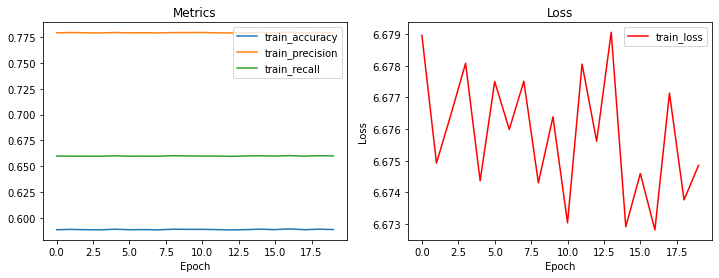

In [28]:
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)

# Plot train accuracy
plt.plot(history1.history['accuracy'], label='train_accuracy')
plt.plot(history1.history['precision'], label='train_precision')
plt.plot(history1.history['recall'], label='train_recall')

plt.xlabel('Epoch')
plt.title('Metrics')
plt.legend()

fig.add_subplot(1, 2, 2)

# Plot train loss
plt.plot(history1.history['loss'], label='train_loss', color='red')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

Test

In [29]:
# Evaluate
test_loss1, test_acc1, test_prec1, test_rec1 = model1.evaluate(test_dataset)

print("Test accuracy: ", test_acc1)
print("Test precision: ", test_prec1)
print("Test recall: ", test_rec1)

15/15 [==============================] - 0s 20ms/step - loss: 5.8287 - accuracy: 0.6624 - precision: 0.7780 - recall: 0.7938
Test accuracy:  0.6623841524124146
Test precision:  0.7780404090881348
Test recall:  0.7938268780708313


In [30]:
predictions1 = model1.predict(test_dataset)
predictions1.shape

(30, 512, 512, 1)

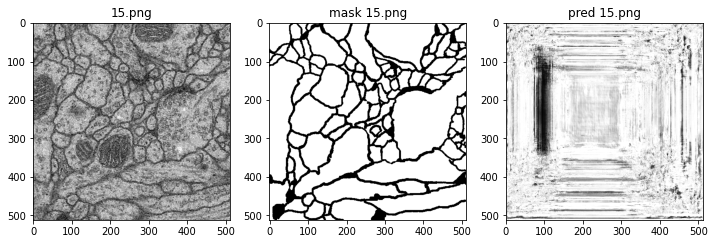

In [31]:
test_img, test_y = read_image(files[0], targets[0]) # see first image results

# Plot
multiplot([np.squeeze(test_img), np.squeeze(test_y), np.squeeze(predictions1[0])], 
          [files[0].split('/')[-1], 'mask ' + str(files[0].split('/')[-1]), 'pred ' + str(files[0].split('/')[-1])])

### MLflow

In [32]:
with mlflow.start_run(run_name='first_FCN_model'):
  mlflow.log_param('model', '1')
  mlflow.log_param('epochs', epochs)
  mlflow.log_param('batch_size', batch_size)
  mlflow.log_param('optimizer', 'Adam')
  mlflow.log_param('lr', 1e-4)
  mlflow.log_param('loss_function', 'weighted_bce')
  mlflow.log_param('Conv2D_layers_number', 34)
  mlflow.log_param('activation_function', 'relu')
  mlflow.log_param('filters', 'from 8 to 512')
  mlflow.log_param('pooling_layers_number', 6)
  mlflow.log_param('upsampling_layers_number', 6)
  mlflow.log_param('dropout', 0.4)
  mlflow.log_param('output_activation_function', 'sigmoid')

  mlflow.log_metric("accuracy train", history1.history['accuracy'][-1])
  mlflow.log_metric("precision train", history1.history['precision'][-1])
  mlflow.log_metric("recall train", history1.history['recall'][-1])
  mlflow.log_metric("loss train", history1.history['loss'][-1])

  mlflow.log_metric("accuracy test", test_acc1)
  mlflow.log_metric("precision test", test_prec1)
  mlflow.log_metric("recall test", test_rec1)
  mlflow.log_metric("loss test", test_loss1)

## 4.2. Second experiment
https://github.com/zhixuhao/unet with less layers, but more complex.

In [33]:
def unet(pretrained_weights=None, input_size=(512,512,1)):
  inputs = tf.keras.layers.Input(input_size)

  conv1 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
  conv1 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
  
  conv2 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
  conv2 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
  drop2 = tf.keras.layers.Dropout(0.5)(conv2)
  pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop2)

  conv3 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
  conv3 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
  drop3 = tf.keras.layers.Dropout(0.5)(conv3)

  up4 = tf.keras.layers.UpSampling2D(size = (2,2))(drop3)
  up4 = tf.keras.layers.Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up4)
  merge4 = tf.keras.layers.concatenate([drop2, up4], axis = 3)
  conv4 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge4)
  conv4 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)

  up5 = tf.keras.layers.UpSampling2D(size = (2,2))(conv4)
  up5 = tf.keras.layers.Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up5)
  merge5 = tf.keras.layers.concatenate([conv1, up5], axis = 3)
  conv5 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge5)
  conv5 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)

  conv6 = tf.keras.layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
  outputs = tf.keras.layers.Conv2D(1, 1, activation = 'sigmoid')(conv6)

  model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='second_unet_model')
  
  if(pretrained_weights):
    model.load_weights(pretrained_weights)

  return model

model2 = unet()
model2.summary()

Model: "second_unet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 512, 512, 128 1280        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 512, 512, 128 147584      conv2d_34[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 256, 256, 128 0           conv2d_35[0][0]                  
__________________________________________________________________________________

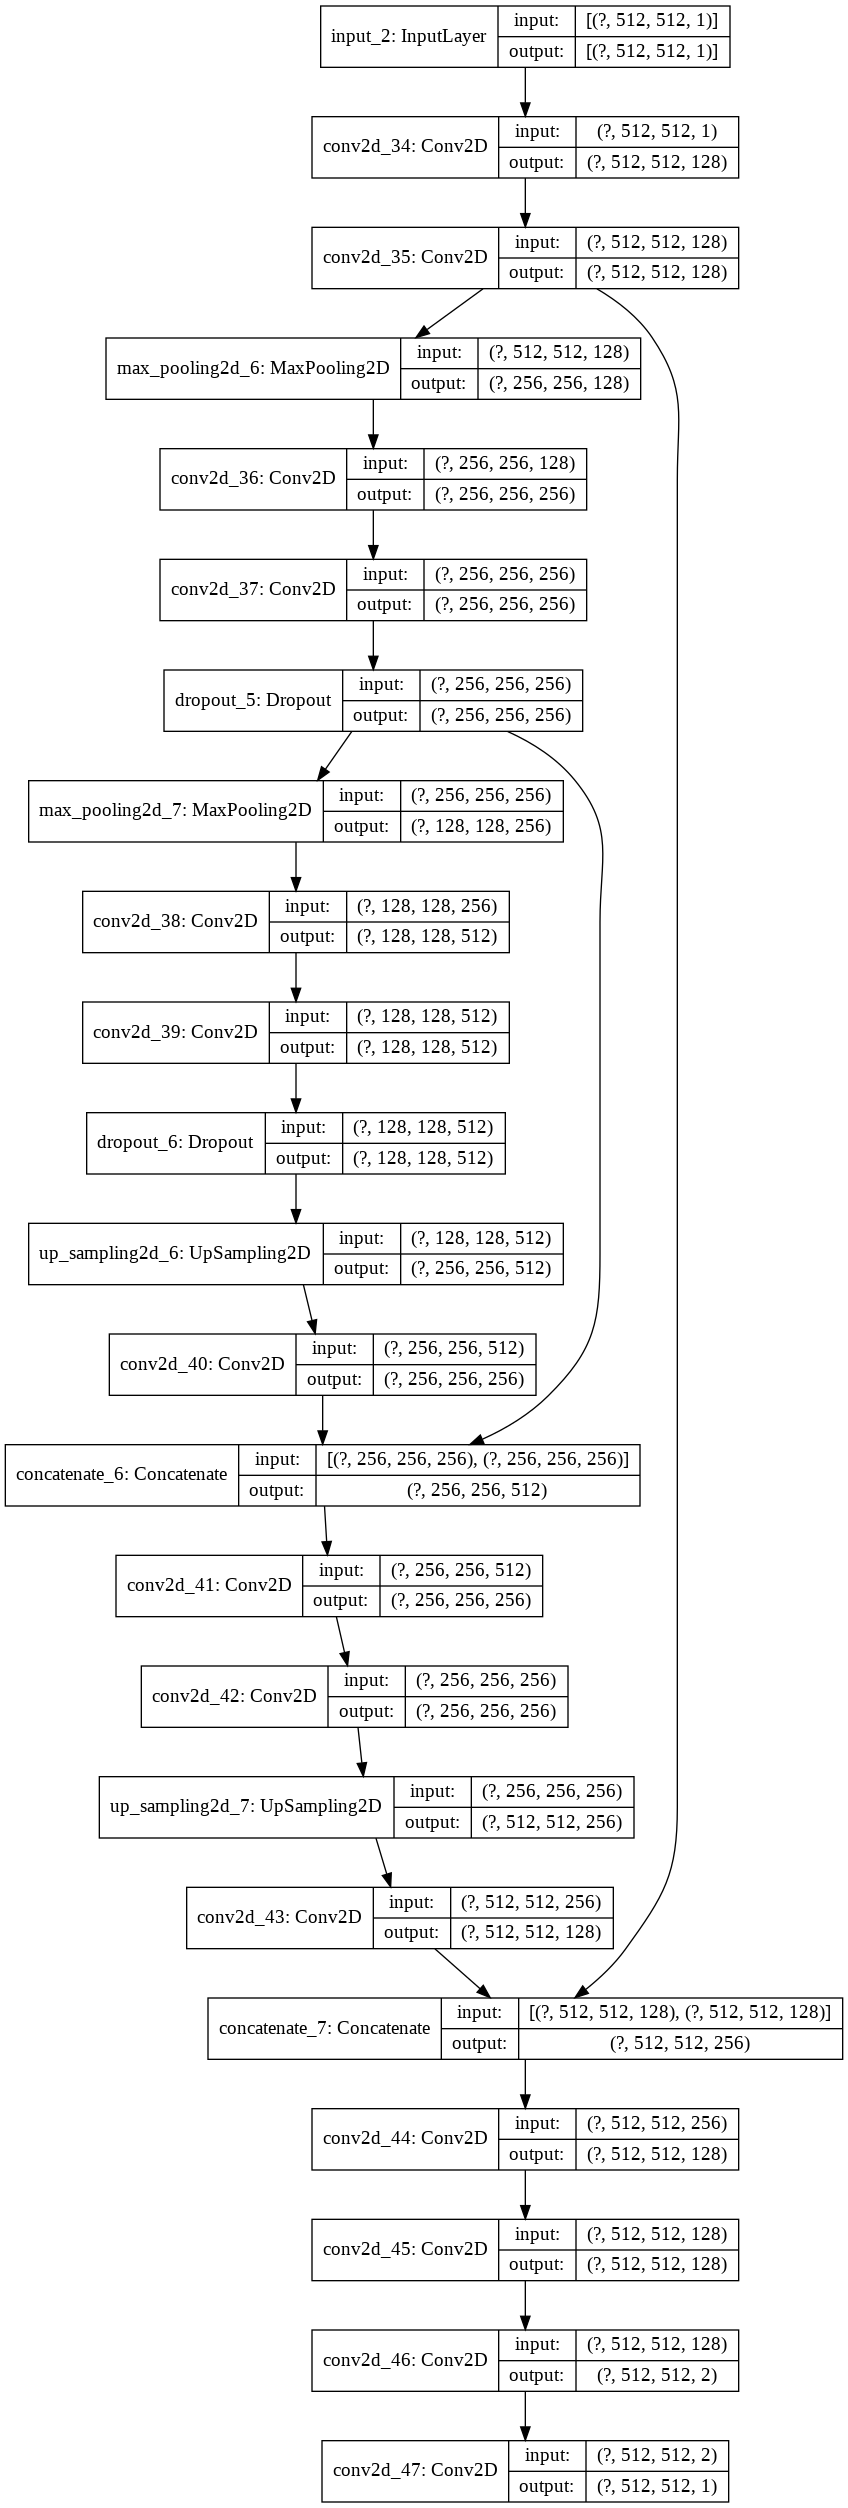

In [34]:
tf.keras.utils.plot_model(model2, show_shapes=True) # Visualize model graph

In [35]:
model2.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 1e-4), 
    loss = 'binary_crossentropy', 
    metrics = [
      'accuracy',
      tf.keras.metrics.Precision(name='precision'), 
      tf.keras.metrics.Recall(name='recall')
    ]
)

In [36]:
history2 = model2.fit(train_dataset, epochs=epochs) # Training

Epoch 1/20
15/15 [==============================] - 7s 489ms/step - loss: 0.5659 - accuracy: 0.7405 - precision: 0.7789 - recall: 0.9320
Epoch 2/20
15/15 [==============================] - 7s 488ms/step - loss: 0.4778 - accuracy: 0.7804 - precision: 0.7804 - recall: 1.0000
Epoch 3/20
15/15 [==============================] - 8s 512ms/step - loss: 0.4012 - accuracy: 0.7804 - precision: 0.7804 - recall: 1.0000
Epoch 4/20
15/15 [==============================] - 7s 489ms/step - loss: 0.3482 - accuracy: 0.7804 - precision: 0.7804 - recall: 1.0000
Epoch 5/20
15/15 [==============================] - 7s 488ms/step - loss: 0.3360 - accuracy: 0.8424 - precision: 0.8639 - recall: 0.9472
Epoch 6/20
15/15 [==============================] - 8s 510ms/step - loss: 0.3296 - accuracy: 0.8640 - precision: 0.8932 - recall: 0.9378
Epoch 7/20
15/15 [==============================] - 8s 511ms/step - loss: 0.3254 - accuracy: 0.8676 - precision: 0.8957 - recall: 0.9397
Epoch 8/20
15/15 [=======================

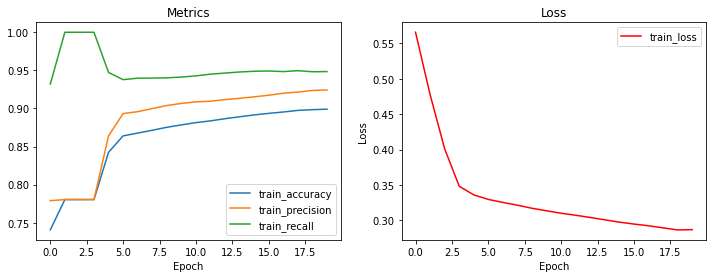

In [37]:
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)

# Plot train accuracy
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['precision'], label='train_precision')
plt.plot(history2.history['recall'], label='train_recall')

plt.xlabel('Epoch')
plt.title('Metrics')
plt.legend()

fig.add_subplot(1, 2, 2)

# Plot train loss
plt.plot(history2.history['loss'], label='train_loss', color='red')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [38]:
# Evaluate
test_loss2, test_acc2, test_prec2, test_rec2 = model2.evaluate(test_dataset)

print("Test accuracy: ", test_acc2)
print("Test precision: ", test_prec2)
print("Test recall: ", test_rec2)

15/15 [==============================] - 3s 171ms/step - loss: 0.2895 - accuracy: 0.8907 - precision: 0.8943 - recall: 0.9753
Test accuracy:  0.8907053470611572
Test precision:  0.8942664861679077
Test recall:  0.9752539992332458


In [39]:
predictions2 = model2.predict(test_dataset)
predictions2.shape

(30, 512, 512, 1)

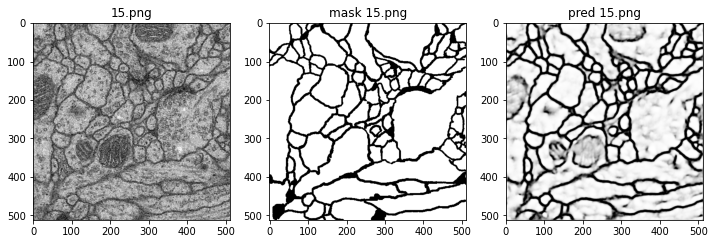

In [40]:
test_img, test_y = read_image(files[0], targets[0]) # see first image results

# Plot
multiplot([np.squeeze(test_img), np.squeeze(test_y), np.squeeze(predictions2[0])], 
          [files[0].split('/')[-1], 'mask ' + str(files[0].split('/')[-1]), 'pred ' + str(files[0].split('/')[-1])])

### MLflow

In [41]:
with mlflow.start_run(run_name='second_unet_model'):
  mlflow.log_param('model', '2')
  mlflow.log_param('epochs', epochs)
  mlflow.log_param('batch_size', batch_size)
  mlflow.log_param('optimizer', 'Adam')
  mlflow.log_param('lr', 1e-4)
  mlflow.log_param('loss_function', 'binary_crossentropy')
  mlflow.log_param('Conv2D_layers_number', 14)
  mlflow.log_param('activation_function', 'relu')
  mlflow.log_param('filters', 'from 128 to 512')
  mlflow.log_param('pooling_layers_number', 2)
  mlflow.log_param('upsampling_layers_number', 2)
  mlflow.log_param('dropout', 0.5)
  mlflow.log_param('output_activation_function', 'sigmoid')

  mlflow.log_metric("accuracy train", history2.history['accuracy'][-1])
  mlflow.log_metric("precision train", history2.history['precision'][-1])
  mlflow.log_metric("recall train", history2.history['recall'][-1])
  mlflow.log_metric("loss train", history2.history['loss'][-1])

  mlflow.log_metric("accuracy test", test_acc2)
  mlflow.log_metric("precision test", test_prec2)
  mlflow.log_metric("recall test", test_rec2)
  mlflow.log_metric("loss test", test_loss2)

## 4.3. Third experiment: Unet membrane model

https://github.com/zhixuhao/unet

In [42]:
def unet2(pretrained_weights = None,input_size = (512,512,1)):
  inputs = tf.keras.layers.Input(input_size)
  conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
  conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
  conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
  pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

  conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
  conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
  pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
  
  conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
  conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
  drop4 = tf.keras.layers.Dropout(0.5)(conv4)
  pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

  conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
  conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
  drop5 = tf.keras.layers.Dropout(0.5)(conv5)

  up6 = tf.keras.layers.UpSampling2D(size = (2,2))(drop5)
  up6 = tf.keras.layers.Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up6)
  merge6 = tf.keras.layers.concatenate([drop4, up6], axis = 3)
  conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
  conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

  up7 = tf.keras.layers.UpSampling2D(size = (2,2))(conv6)
  up7 = tf.keras.layers.Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up7)
  merge7 = tf.keras.layers.concatenate([conv3, up7], axis = 3)
  conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
  conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

  up8 = tf.keras.layers.UpSampling2D(size = (2,2))(conv7)
  up8 = tf.keras.layers.Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up8)
  merge8 = tf.keras.layers.concatenate([conv2, up8], axis = 3)
  conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
  conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

  up9 = tf.keras.layers.UpSampling2D(size = (2,2))(conv8)
  up9 = tf.keras.layers.Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up9)
  merge9 = tf.keras.layers.concatenate([conv1, up9], axis = 3)
  conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
  conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

  conv9 = tf.keras.layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
  outputs = tf.keras.layers.Conv2D(1, 1, activation = 'sigmoid')(conv9)

  model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='third_unet_model')
  
  if(pretrained_weights):
    model.load_weights(pretrained_weights)

  return model

model3 = unet2()
model3.summary()

Model: "third_unet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 512, 512, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_48[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_49[0][0]                  
___________________________________________________________________________________

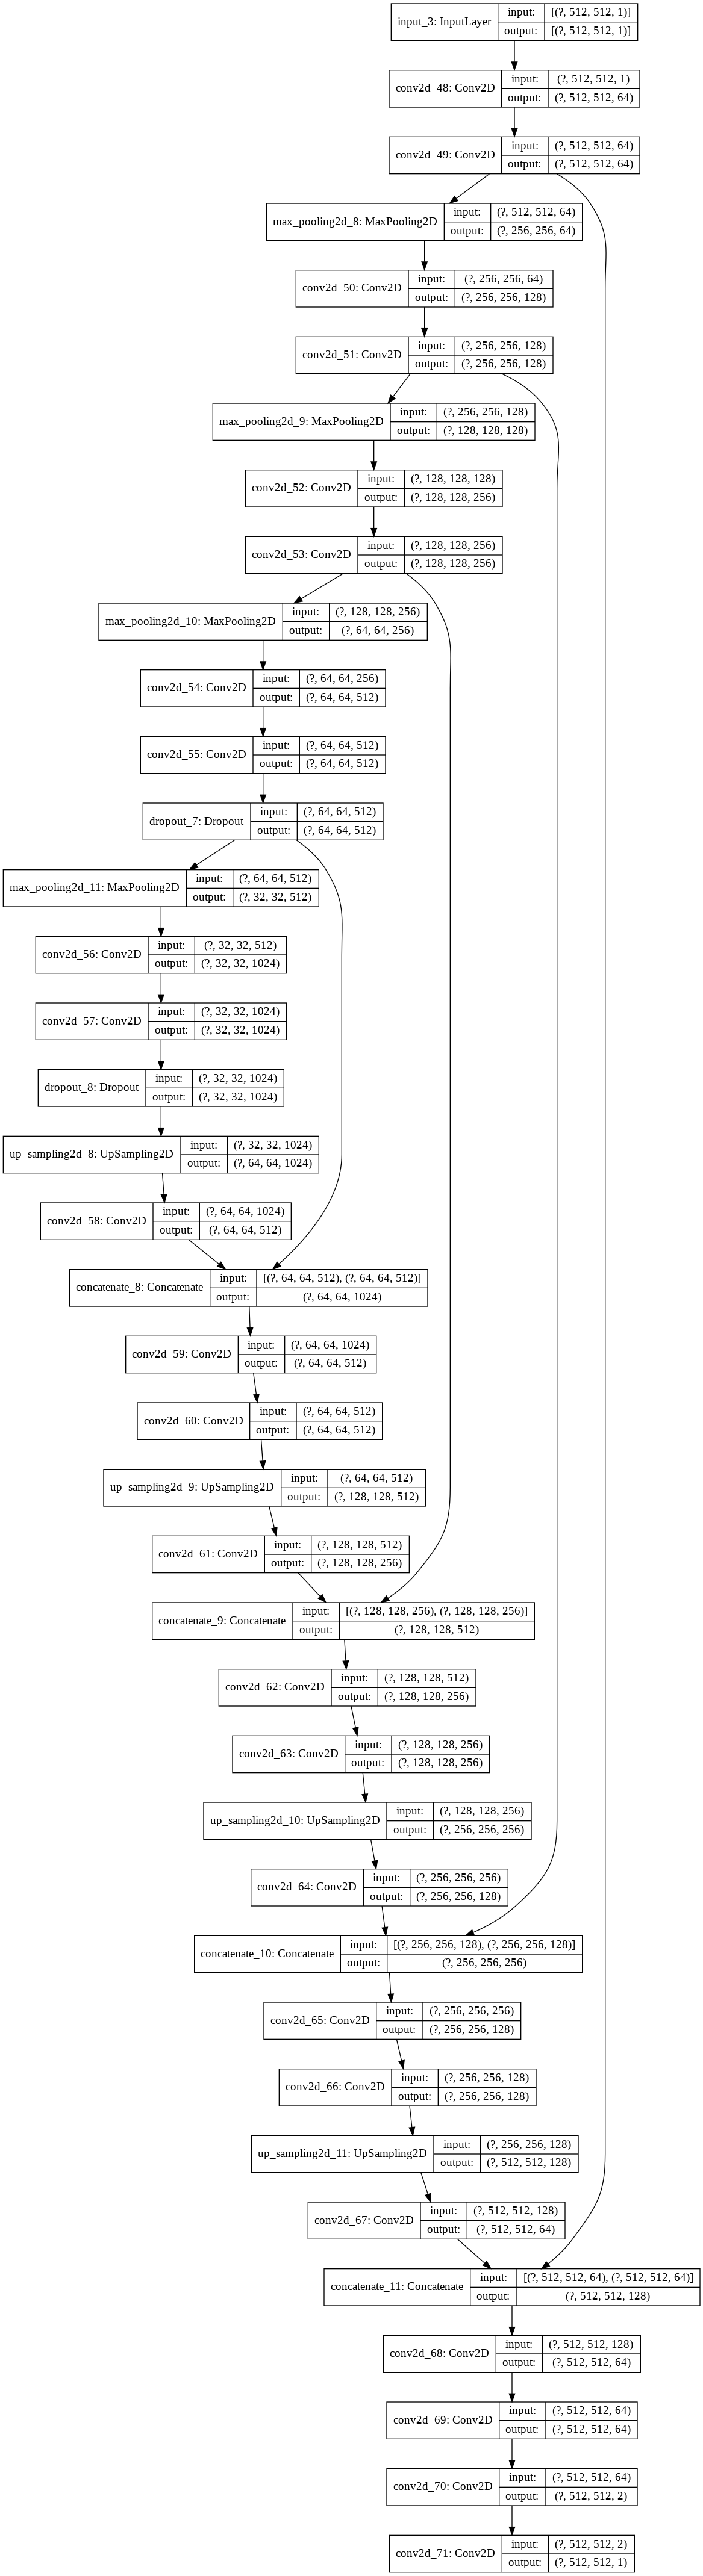

In [43]:
tf.keras.utils.plot_model(model3, show_shapes=True) # Visualize model graph

In [44]:
model3.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 1e-4), 
    loss = 'binary_crossentropy', 
    metrics = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'), 
                tf.keras.metrics.Recall(name='recall')
              ]
)

In [45]:
history3 = model3.fit(train_dataset, epochs=epochs) # Training

Epoch 1/20
15/15 [==============================] - 4s 278ms/step - loss: 0.5069 - accuracy: 0.7616 - precision: 0.7798 - recall: 0.9678
Epoch 2/20
15/15 [==============================] - 4s 277ms/step - loss: 0.3918 - accuracy: 0.7931 - precision: 0.7953 - recall: 0.9895
Epoch 3/20
15/15 [==============================] - 4s 289ms/step - loss: 0.3460 - accuracy: 0.8430 - precision: 0.8642 - recall: 0.9476
Epoch 4/20
15/15 [==============================] - 4s 281ms/step - loss: 0.3312 - accuracy: 0.8575 - precision: 0.8936 - recall: 0.9280
Epoch 5/20
15/15 [==============================] - 4s 278ms/step - loss: 0.3285 - accuracy: 0.8596 - precision: 0.9021 - recall: 0.9200
Epoch 6/20
15/15 [==============================] - 4s 291ms/step - loss: 0.3175 - accuracy: 0.8670 - precision: 0.9060 - recall: 0.9255
Epoch 7/20
15/15 [==============================] - 4s 290ms/step - loss: 0.3141 - accuracy: 0.8708 - precision: 0.9127 - recall: 0.9227
Epoch 8/20
15/15 [=======================

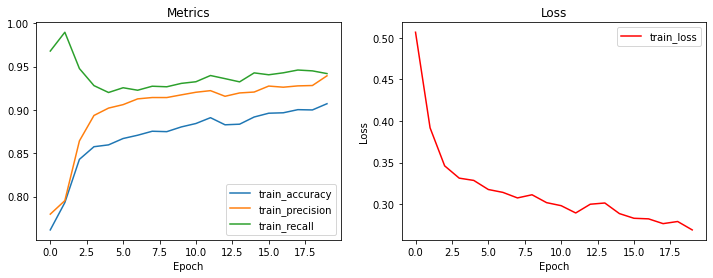

In [46]:
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)

# Plot train accuracy
plt.plot(history3.history['accuracy'], label='train_accuracy')
plt.plot(history3.history['precision'], label='train_precision')
plt.plot(history3.history['recall'], label='train_recall')

plt.xlabel('Epoch')
plt.title('Metrics')
plt.legend()

fig.add_subplot(1, 2, 2)

# Plot train loss
plt.plot(history3.history['loss'], label='train_loss', color='red')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [47]:
# Evaluate
test_loss3, test_acc3, test_prec3, test_rec3 = model3.evaluate(test_dataset)

print("Test accuracy: ", test_acc3)
print("Test precision: ", test_prec3)
print("Test recall: ", test_rec3)

15/15 [==============================] - 1s 95ms/step - loss: 0.2746 - accuracy: 0.9042 - precision: 0.9215 - recall: 0.9589
Test accuracy:  0.9041903018951416
Test precision:  0.9215095043182373
Test recall:  0.9589003920555115


In [48]:
predictions3 = model3.predict(test_dataset)
predictions3.shape

(30, 512, 512, 1)

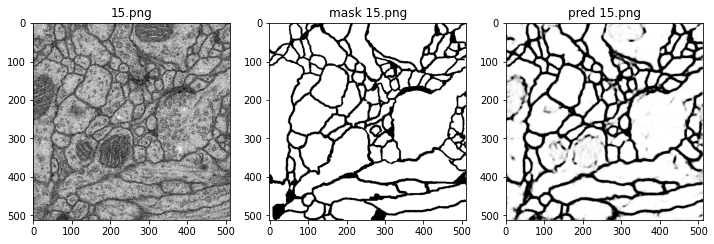

In [49]:
test_img, test_y = read_image(files[0], targets[0]) # see first image results

# Plot
multiplot([np.squeeze(test_img), np.squeeze(test_y), np.squeeze(predictions3[0])], 
          [files[0].split('/')[-1], 'mask ' + str(files[0].split('/')[-1]), 'pred ' + str(files[0].split('/')[-1])])

### MLflow

In [50]:
with mlflow.start_run(run_name='third_unet_model'):
  mlflow.log_param('model', '3')
  mlflow.log_param('epochs', epochs)
  mlflow.log_param('batch_size', batch_size)
  mlflow.log_param('optimizer', 'Adam')
  mlflow.log_param('lr', 1e-4)
  mlflow.log_param('loss_function', 'binary_crossentropy')
  mlflow.log_param('Conv2D_layers_number', 24)
  mlflow.log_param('activation_function', 'relu')
  mlflow.log_param('filters', 'from 64 to 1024')
  mlflow.log_param('pooling_layers_number', 4)
  mlflow.log_param('upsampling_layers_number', 4)
  mlflow.log_param('dropout', 0.5)
  mlflow.log_param('output_activation_function', 'sigmoid')

  mlflow.log_metric("accuracy train", history3.history['accuracy'][-1])
  mlflow.log_metric("precision train", history3.history['precision'][-1])
  mlflow.log_metric("recall train", history3.history['recall'][-1])
  mlflow.log_metric("loss train", history3.history['loss'][-1])

  mlflow.log_metric("accuracy test", test_acc3)
  mlflow.log_metric("precision test", test_prec3)
  mlflow.log_metric("recall test", test_rec3)
  mlflow.log_metric("loss test", test_loss3)

# MLflow analysis

To analyse the experiments with the different models, we have to export to zip the folder `mlruns`, and from our local environment, execute the command `mlflow ui` inside the folder `content`. The results are in `localhost:5000`.

In [51]:
!zip -r /content/mlruns.zip /content/mlruns

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/0/ (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/ (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/artifacts/ (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/ (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/loss_function (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/Conv2D_layers_number (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/optimizer (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/activation_function (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/model (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/lr (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a9278647175493c70/params/filters (stored 0%)
  adding: content/mlruns/0/b2cec31760dc4e5a92786471

In [52]:
from google.colab import files
files.download("/content/mlruns.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>